In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_segmentation.csv')

In [3]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 9)

In [5]:
df.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.dtypes

index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.00000,541909.000000,541909.000000,406829.000000
mean,270954.00000,9.552250,4.611114,15287.690570
std,156435.79785,218.081158,96.759853,1713.600303
min,0.00000,-80995.000000,-11062.060000,12346.000000
25%,135477.00000,1.000000,1.250000,13953.000000
50%,270954.00000,3.000000,2.080000,15152.000000
75%,406431.00000,10.000000,4.130000,16791.000000
max,541908.00000,80995.000000,38970.000000,18287.000000


In [8]:
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df[df['CustomerID'].isnull()]['InvoiceNo']

622       536414
1443      536544
1444      536544
1445      536544
1446      536544
           ...  
541536    581498
541537    581498
541538    581498
541539    581498
541540    581498
Name: InvoiceNo, Length: 135080, dtype: object

In [10]:
df.dropna(inplace=True)

In [11]:
df.drop(columns=['Description'],inplace=True)
df.drop(columns=['index'],inplace=True)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(401602, 7)

In [14]:
df['CustomerID'] = df['CustomerID'].astype(str)
df.dtypes

InvoiceNo       object
StockCode       object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [15]:
df['InvoiceDate'].unique()

array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      dtype=object)

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['InvoiceDate'].unique()

<DatetimeArray>
['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00',
 '2010-12-01 08:35:00', '2010-12-01 08:45:00', '2010-12-01 09:00:00',
 '2010-12-01 09:01:00', '2010-12-01 09:02:00', '2010-12-01 09:09:00',
 '2010-12-01 09:32:00',
 ...
 '2011-12-09 12:09:00', '2011-12-09 12:16:00', '2011-12-09 12:19:00',
 '2011-12-09 12:20:00', '2011-12-09 12:21:00', '2011-12-09 12:23:00',
 '2011-12-09 12:25:00', '2011-12-09 12:31:00', '2011-12-09 12:49:00',
 '2011-12-09 12:50:00']
Length: 20460, dtype: datetime64[ns]

In [17]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [18]:
unique_customers_per_month = df.drop_duplicates(subset=['YearMonth', 'CustomerID']).groupby('YearMonth').size()

Text(0.5, 1.0, 'Number of Active Customers per Month')

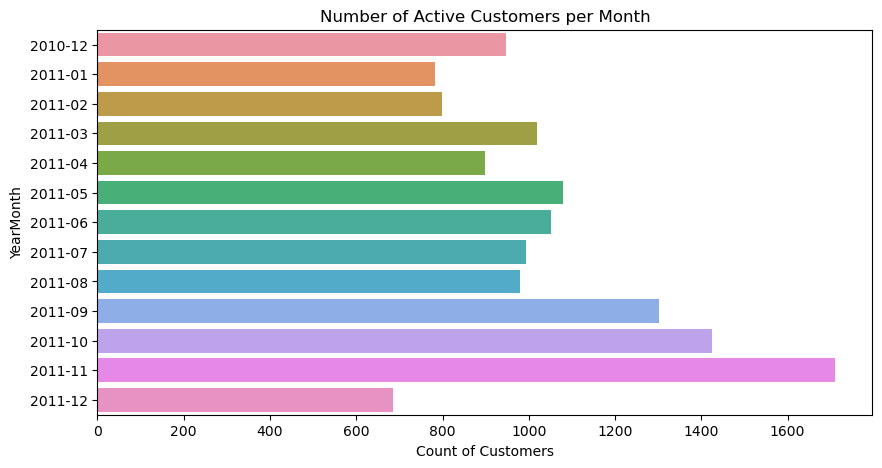

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(y = unique_customers_per_month.index, x =unique_customers_per_month.values);
plt.xlabel('Count of Customers')
plt.title('Number of Active Customers per Month')

In [20]:
 df['total_spent'] = df['Quantity']*df['UnitPrice']

In [21]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'YearMonth', 'total_spent'],
      dtype='object')

In [22]:
grouped = df.groupby('CustomerID').sum(numeric_only=True)

customer_spending = grouped[['total_spent']].reset_index()

customer_spending

,CustomerID,total_spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


In [23]:
df_frequency = df.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
df_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [24]:
latest_order_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
df['days_since_order'] = (latest_order_date - df['InvoiceDate']).dt.days
df.head()


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,total_spent,days_since_order
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,374
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,374
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374


In [25]:
customer_recency = df.groupby('CustomerID')['days_since_order'].min().reset_index()
customer_recency

,CustomerID,days_since_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4367,18280.0,278
4368,18281.0,181
4369,18282.0,8
4370,18283.0,4


In [26]:
rf_metrics = pd.merge(customer_recency, df_frequency, on='CustomerID', how='inner')
rfm_metrics = pd.merge(rf_metrics, customer_spending, on='CustomerID', how='inner')

In [27]:
rfm_metrics.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm_metrics

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2045.53


recency_segment
newest    2734
newer      588
medium     416
older      353
oldest     281
Name: count, dtype: int64

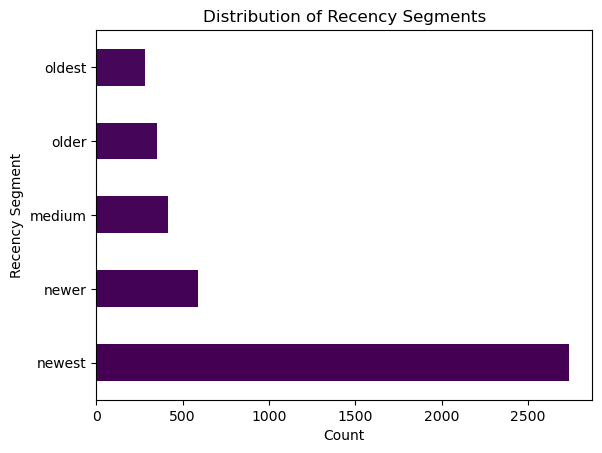

In [28]:
rfm_metrics['recency_segment'] = pd.cut(rfm_metrics['Recency'], bins=5,
                                        labels=['newest', 'newer', 'medium', 'older', 'oldest'])
palette = sns.color_palette("viridis", as_cmap=True)

rfm_metrics['recency_segment'].value_counts().plot(kind='barh', color=palette(range(5)))

plt.xlabel('Count')
plt.ylabel('Recency Segment')
plt.title('Distribution of Recency Segments')
rfm_metrics['recency_segment'].value_counts()

frequency_segment
lowest     4348
lower        18
medium        3
highest       2
higher        1
Name: count, dtype: int64

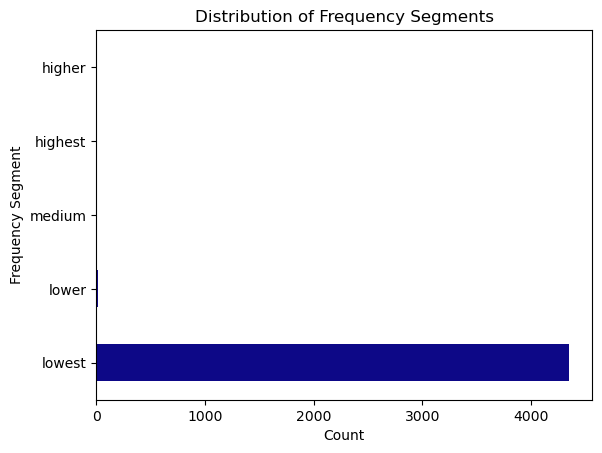

In [29]:
# Assign labels based on frequency bins
rfm_metrics['frequency_segment'] = pd.cut(rfm_metrics['Frequency'], bins=5,
                                          labels=['lowest', 'lower', 'medium', 'higher', 'highest'])

palette = sns.color_palette("plasma", as_cmap=True)
rfm_metrics['frequency_segment'].value_counts().plot(kind='barh', color=palette(range(5)))
plt.xlabel('Count')
plt.ylabel('Frequency Segment')
plt.title('Distribution of Frequency Segments')

rfm_metrics['frequency_segment'].value_counts()


monetary_segment
smallest    4357
smaller        9
medium         3
largest        2
larger         1
Name: count, dtype: int64

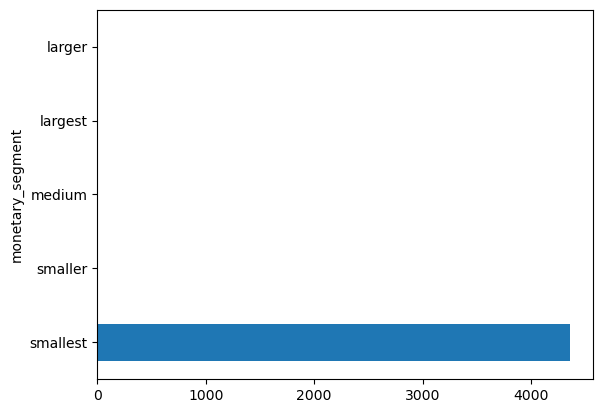

In [30]:
rfm_metrics['monetary_segment'] = pd.cut(rfm_metrics['Monetary'], bins=5,
                                         labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])
rfm_metrics['monetary_segment'].value_counts().plot(kind='barh')
rfm_metrics['monetary_segment'].value_counts()


In [31]:
rfm_metrics['rfm_segment'] = rfm_metrics[['recency_segment','frequency_segment','monetary_segment']].agg('-'.join, axis=1)
rfm_metrics

,CustomerID,Recency,Frequency,Monetary,recency_segment,frequency_segment,monetary_segment,rfm_segment
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest
...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,older,lowest,smallest,older-lowest-smallest
4368,18281.0,181,1,80.82,medium,lowest,smallest,medium-lowest-smallest
4369,18282.0,8,3,176.60,newest,lowest,smallest,newest-lowest-smallest
4370,18283.0,4,16,2045.53,newest,lowest,smallest,newest-lowest-smallest


In [32]:
# Define dictionaries for mapping labels to scores
recency_dict = {'newest': 5, 'newer': 4, 'medium': 3, 'older': 2, 'oldest': 1}
frequency_dict = {'lowest': 1, 'lower': 2, 'medium': 3, 'higher': 4, 'highest': 5}
monetary_dict = {'smallest': 1, 'smaller': 2, 'medium': 3, 'larger': 4, 'largest': 5}

# Ensure columns are mapped to numeric values
recency_scores = rfm_metrics['recency_segment'].map(recency_dict).astype(float)
frequency_scores = rfm_metrics['frequency_segment'].map(frequency_dict).astype(float)
monetary_scores = rfm_metrics['monetary_segment'].map(monetary_dict).astype(float)

# Calculate the RFM score
rfm_metrics['rfm_score'] = recency_scores + frequency_scores + monetary_scores

# Display the DataFrame
rfm_metrics.head(10)


,CustomerID,Recency,Frequency,Monetary,recency_segment,frequency_segment,monetary_segment,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3.0
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7.0
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7.0
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7.0
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3.0
5,12352.0,36,11,1545.41,newest,lowest,smallest,newest-lowest-smallest,7.0
6,12353.0,204,1,89.00,medium,lowest,smallest,medium-lowest-smallest,5.0
7,12354.0,232,1,1079.40,older,lowest,smallest,older-lowest-smallest,4.0
8,12355.0,214,1,459.40,medium,lowest,smallest,medium-lowest-smallest,5.0
9,12356.0,23,3,2811.43,newest,lowest,smallest,newest-lowest-smallest,7.0


Text(0.5, 1.0, 'Distribution of RFM Segments')

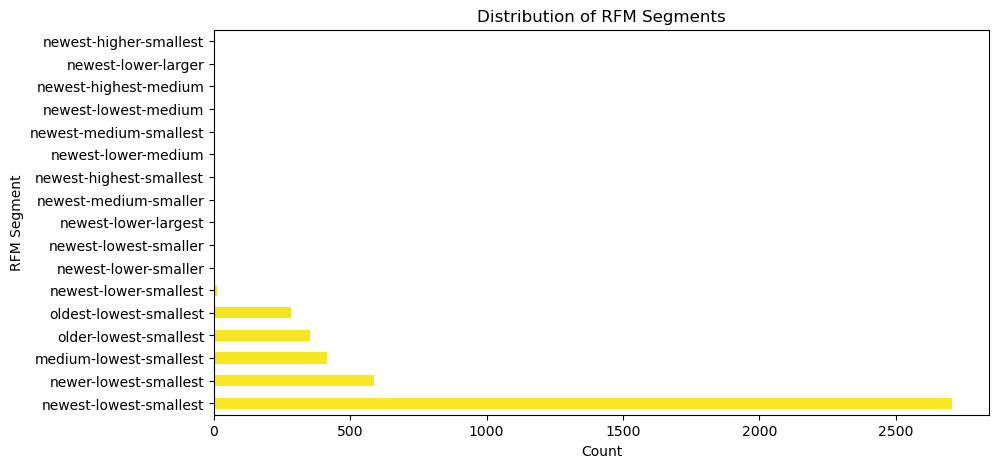

In [33]:
plt.figure(figsize=(10, 5))
ax = rfm_metrics['rfm_segment'].value_counts().plot(kind='barh', color=plt.cm.viridis_r(range(len(rfm_metrics['rfm_segment'].value_counts()))))
plt.xlabel('Count')
plt.ylabel('RFM Segment')
plt.title('Distribution of RFM Segments')


# CREATING MODEL

In [34]:
rfm_metrics.shape

(4372, 9)

In [35]:
rfm_metrics = rfm_metrics[(rfm_metrics['Frequency']<60) & (rfm_metrics['Monetary']<40000)]

In [36]:
rfm_metrics.shape

(4346, 9)

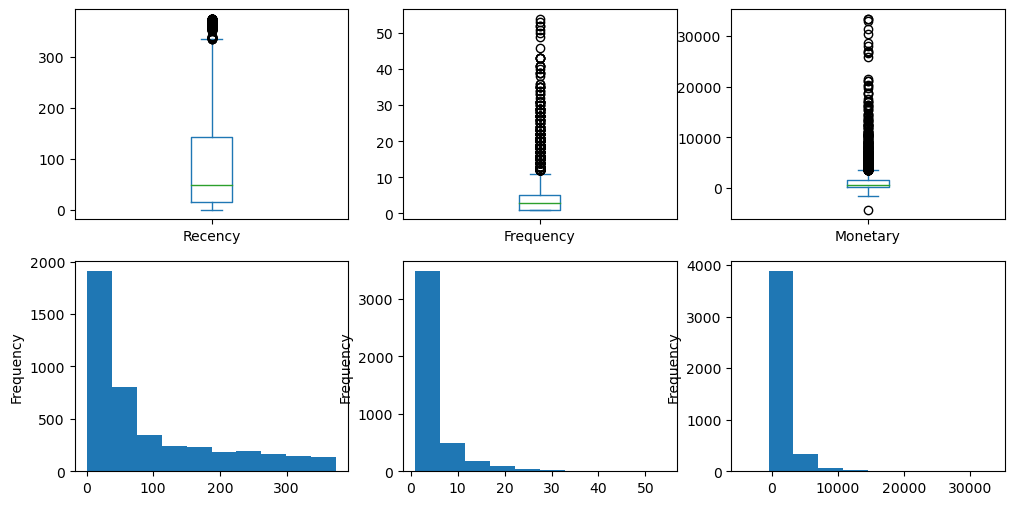

In [37]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    rfm_metrics[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    rfm_metrics[feature].plot(kind='hist')

In [38]:
df_rfm_transformed = pd.DataFrame()
df_rfm_transformed['Recency'] = np.log(rfm_metrics['Recency'])
df_rfm_transformed['Frequency'] = np.log(rfm_metrics['Frequency'])
df_rfm_transformed['Monetary'] = np.log(rfm_metrics['Monetary']-rfm_metrics['Monetary'].min()+1)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
df_rfm_scaled_array = scaler.fit_transform(df_rfm_transformed[['Recency', 'Frequency', 'Monetary']])
df_rfm_scaled = pd.DataFrame(df_rfm_scaled_array, columns=['Recency', 'Frequency', 'Monetary'])
df_rfm_scaled.head()

,Recency,Frequency,Monetary
0,1.402988,-0.388507,-0.770922
1,-2.100874,0.967301,1.485132
2,0.392218,0.361655,0.364190
3,-0.552268,-1.138669,0.342970
4,1.368370,-1.138669,-0.527416


In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)


E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=3)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

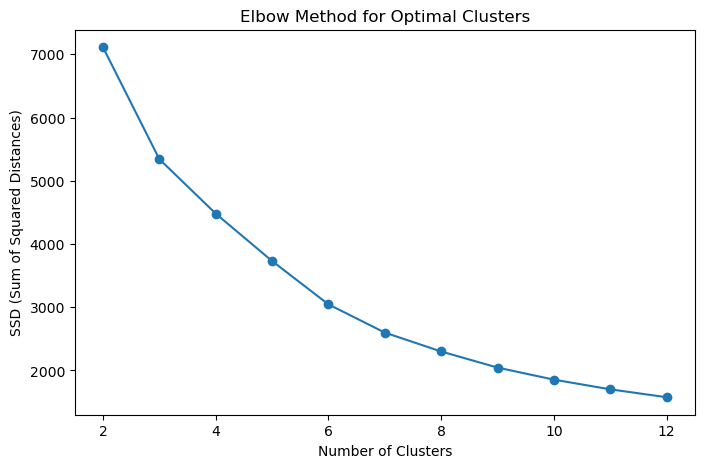

In [42]:

range_n_clusters = range(2, 13)

# Calculate the sum of squared distances (SSD) for each number of clusters
ssd = [KMeans(n_clusters=k, max_iter=100, random_state=42).fit(df_rfm_scaled).inertia_ for k in range_n_clusters]

# Plot the SSDs to find the Elbow
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [43]:
df_cluster_evaluation = pd.DataFrame({
    'clusters': range(2, 13),
    'inertia': ssd
})

df_cluster_evaluation

,clusters,inertia
0,2,7113.109513
1,3,5343.136928
2,4,4481.046493
3,5,3730.769791
4,6,3045.029993
5,7,2598.297835
6,8,2299.172220
7,9,2044.782467
8,10,1853.863670
9,11,1700.403332


In [44]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)

silhouette_scores = [
    silhouette_score(df_rfm_scaled, KMeans(n_clusters=k, max_iter=50).fit_predict(df_rfm_scaled))
    for k in range_n_clusters
]

for k, score in zip(range_n_clusters, silhouette_scores):
    print(f"For n_clusters={k}, the silhouette score is {score:.4f}")


E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

For n_clusters=2, the silhouette score is 0.4413
For n_clusters=3, the silhouette score is 0.3815
For n_clusters=4, the silhouette score is 0.3623
For n_clusters=5, the silhouette score is 0.3648
For n_clusters=6, the silhouette score is 0.3441
For n_clusters=7, the silhouette score is 0.3430
For n_clusters=8, the silhouette score is 0.3354
For n_clusters=9, the silhouette score is 0.3466
For n_clusters=10, the silhouette score is 0.3557


In [45]:
kmeans_final = KMeans(n_clusters=3, max_iter=50)
kmeans_final.fit(df_rfm_scaled)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=3)

In [46]:
rfm_metrics['Cluster_Id'] = kmeans_final.labels_
rfm_metrics.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8036\2155115067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_metrics['Cluster_Id'] = kmeans_final.labels_


,CustomerID,Recency,Frequency,Monetary,recency_segment,frequency_segment,monetary_segment,rfm_segment,rfm_score,Cluster_Id
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3.0,0
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7.0,2
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7.0,1
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7.0,0
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3.0,0


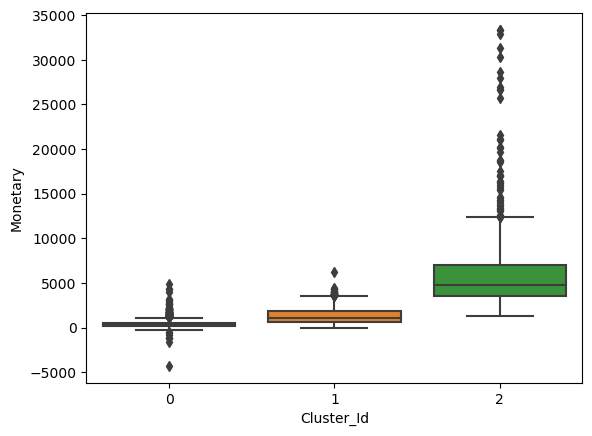

In [47]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm_metrics);


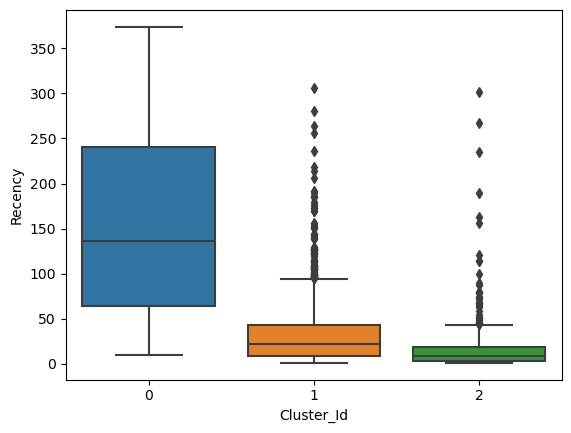

In [48]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_metrics);


# **Summary:**

### From the boxplots above, we can see that our model has effectively segmented customers into three distinct groups, each with specific characteristics:

1. **Cluster Id 0**: This group consists of customers who buy infrequently, spend little, and have not made recent purchases. As a result, they are the least valuable to the business.

2. **Cluster Id 1**: Customers in this cluster have average scores for recency, frequency, and monetary expenditure. They represent a middle-ground group in terms of engagement and spending.

3. **Cluster Id 2**: This cluster includes the most engaged customers who make frequent purchases, spend a lot, and have recently placed orders. They are considered the most valuable to the business.